In [73]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [1]:
# !pip install pandas numpy

#### load data

In [2]:
import pandas as pd
data = pd.read_csv('challenge.txt', sep='\t', header=None)

In [3]:
data.describe().round()

,0,1,2,3,4,5,6,7,8,9
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,10.0,16.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
std,9.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-2.0,-2.0,-3.0,-4.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
25%,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,7.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,19.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,23.0,43.0,4.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scale = scaler.fit_transform(data)

In [6]:
data_scale

array([[-1.14334819e+00, -1.13603309e+00, -1.19112439e+00, ...,
        -1.11496621e-16, -1.59280887e-16, -7.96404435e-17],
       [-1.20491648e+00, -1.11358306e+00, -1.13877166e+00, ...,
        -1.11496621e-16, -1.59280887e-16, -7.96404435e-17],
       [-1.15464112e+00, -1.12815774e+00, -6.31001896e-01, ...,
        -1.11496621e-16, -1.59280887e-16, -7.96404435e-17],
       ...,
       [-2.23260029e-01,  1.71461110e+00,  1.45816659e+00, ...,
        -1.11496621e-16, -1.59280887e-16, -7.96404435e-17],
       [-4.01915284e-01,  1.66678338e+00,  2.50774892e+00, ...,
        -1.11496621e-16, -1.59280887e-16, -7.96404435e-17],
       [-3.58146114e-01,  1.79310953e+00,  2.70740521e+00, ...,
        -1.11496621e-16, -1.59280887e-16, -7.96404435e-17]],
      shape=(1000, 10))

In [7]:
data

,0,1,2,3,4,5,6,7,8,9
0,-0.768094,-1.062899,-1.502895,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.326407,-0.725706,-1.436839,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.870501,-0.944614,-0.796163,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.198228,-0.633996,-1.031985,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.581253,-0.839979,-0.762256,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,8.615801,41.448963,3.758721,3.910819,0.0,0.0,0.0,0.0,0.0,0.0
996,8.360474,41.978658,2.164121,1.970064,0.0,0.0,0.0,0.0,0.0,0.0
997,7.575436,41.752979,1.839834,3.986019,0.0,0.0,0.0,0.0,0.0,0.0
998,5.955357,41.034620,3.164139,2.561729,0.0,0.0,0.0,0.0,0.0,0.0


#### dim

In [8]:
data.shape

(1000, 10)

#### loss data

In [9]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [10]:
# ! pip install matplotlib scikit-learn

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#### Analysis PCA

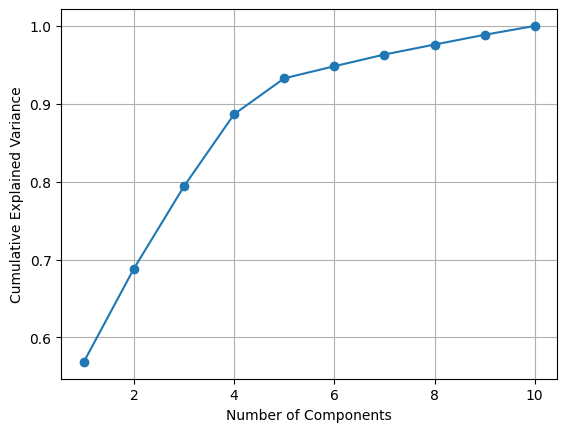

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(data_scale)

plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

##### decrease dim 2D(PCA)

In [13]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scale)

In [14]:
data_pca.shape

(1000, 2)

In [15]:
data_pca

array([[-0.25576564, -0.92444424],
       [-0.24744917, -0.87238435],
       [-0.15619798, -0.5372505 ],
       ...,
       [ 1.14743269,  3.90056875],
       [ 1.02039499,  3.77414527],
       [ 0.64400223,  2.78005948]], shape=(1000, 2))

In [16]:
# data_pca[:,0]

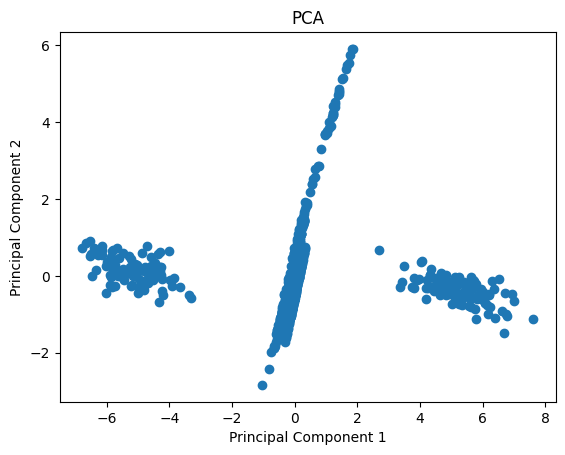

In [17]:
plt.scatter(data_pca[:,0], data_pca[:,1])

plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##### decrease dim 2D(TSNE)

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components=2, random_state=79)
data_tsne = tsne.fit_transform(data_scale)

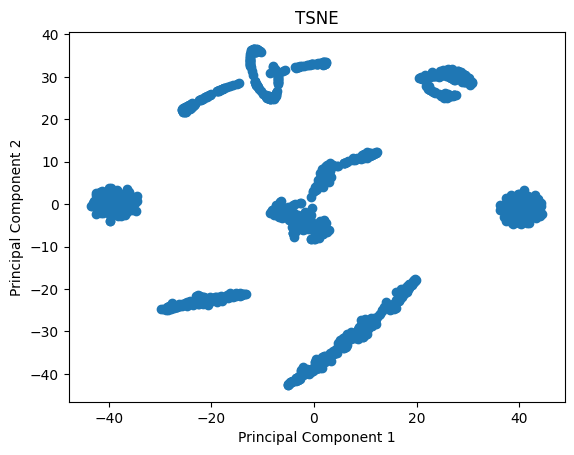

In [20]:
plt.scatter(data_tsne[:,0], data_tsne[:,1])

plt.title('TSNE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [21]:
data[3].mean()

np.float64(7.105427357601002e-17)

### Mean

In [22]:
mean_values = data.mean()

print("میانگین هر ویژگی:")
mean_values

میانگین هر ویژگی:


0    9.600000e+00
1    1.600000e+01
2    7.105427e-17
3    7.105427e-17
4    5.684342e-17
5   -8.526513e-17
6   -2.842171e-17
7    4.973799e-17
8    7.105427e-17
9    3.552714e-17
dtype: float64

### Median

In [23]:
median_values = data.median()

print("میانه هر ویژگی:")
median_values

میانه هر ویژگی:


0     7.299342
1    19.141101
2     0.161230
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
dtype: float64

### Standard Deviation

In [24]:
std_values = data.std()

print("انحراف معیار هر ویژگی:")
std_values

انحراف معیار هر ویژگی:


0     9.072724
1    15.027236
2     1.262376
3     0.997996
4     0.446317
5     0.446317
6     0.446317
7     0.446317
8     0.446317
9     0.446317
dtype: float64

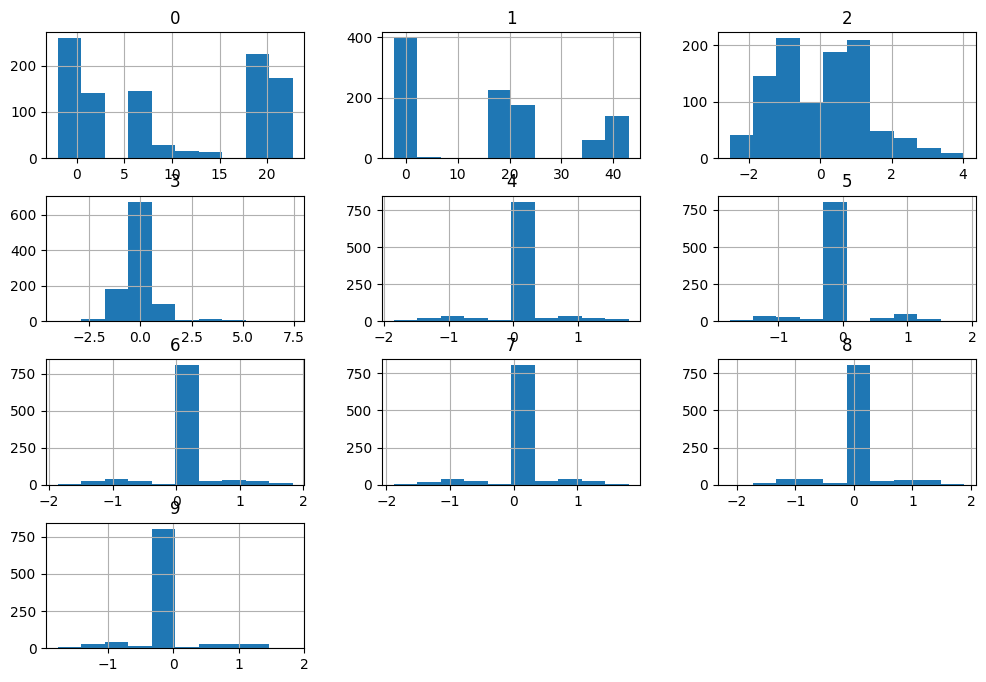

In [25]:
data.hist(figsize=(12, 8))
plt.show()

<div dir="rtl">
ستونهایی مثل 0 و 1 و 2 احتمالاً توزیع غیرنرمال و چندقله ای دارند که میتواند نشاندهنده پیچیدگی ساختار داده.

ستونهایی مثل 4 تا 9 با توزیع متمرکز و تقریباً نرمال، بیشتر شبیه دادههای نرمال یا با نویز کم هستند.
</div>

### Correlation Matrix

In [26]:
correlation_matrix = data.corr()

In [27]:
correlation_matrix

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.070466,0.016294,0.003634,0.042588,0.042597,0.043261,0.043483,0.043791,0.042992
1,-0.070466,1.000000,0.054627,0.033128,0.025379,0.026587,0.025107,0.025946,0.026053,0.025683
2,0.016294,0.054627,1.000000,0.531965,0.304526,0.310113,0.301183,0.305056,0.305016,0.305600
3,0.003634,0.033128,0.531965,1.000000,0.391350,0.400350,0.386955,0.389657,0.386451,0.391081
4,0.042588,0.025379,0.304526,0.391350,1.000000,0.870721,0.859231,0.875492,0.858010,0.856133
5,0.042597,0.026587,0.310113,0.400350,0.870721,1.000000,0.867794,0.866858,0.866950,0.876194
6,0.043261,0.025107,0.301183,0.386955,0.859231,0.867794,1.000000,0.870901,0.875130,0.851270
7,0.043483,0.025946,0.305056,0.389657,0.875492,0.866858,0.870901,1.000000,0.862789,0.861622
8,0.043791,0.026053,0.305016,0.386451,0.858010,0.866950,0.875130,0.862789,1.000000,0.861487
9,0.042992,0.025683,0.305600,0.391081,0.856133,0.876194,0.851270,0.861622,0.861487,1.000000


In [28]:
# data

In [29]:
# !pip install seaborn

In [30]:
import seaborn as sns

Text(0.5, 1.0, 'correlation matrix')

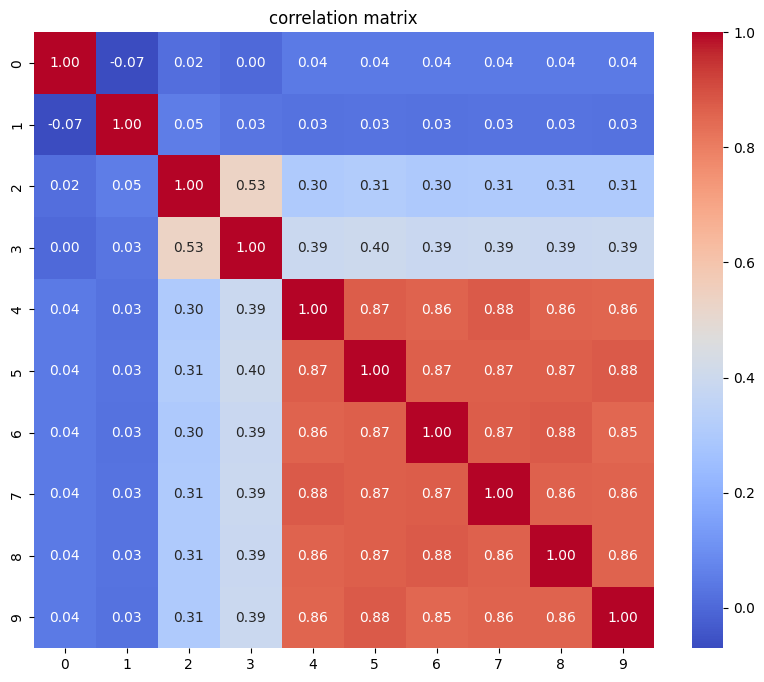

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,  fmt=".2f", cmap='coolwarm')
plt.title("correlation matrix")

<div dir="rtl">
ویژگی هایی که بیشتر از 0.7 و کمتر از منفی 0.7 هستن بیشترین همبستگی را دارند که در این نمونه ویژگی 4 تا 9 میشود.
</div>

##### K-Means Clustering

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
cluster_kmean = kmeans.fit_predict(data_pca)

In [33]:
# cluster_kmean

##### DBSCAN Clustering

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5)
cluster_dbscan = dbscan.fit_predict(data_pca)

In [35]:
# cluster_dbscan

##### Hierarchical Clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=3)
cluster_hier = hier.fit_predict(data_pca)

In [37]:
# hier

In [38]:
# cluster_hier

In [39]:
# data.iloc[:,9]

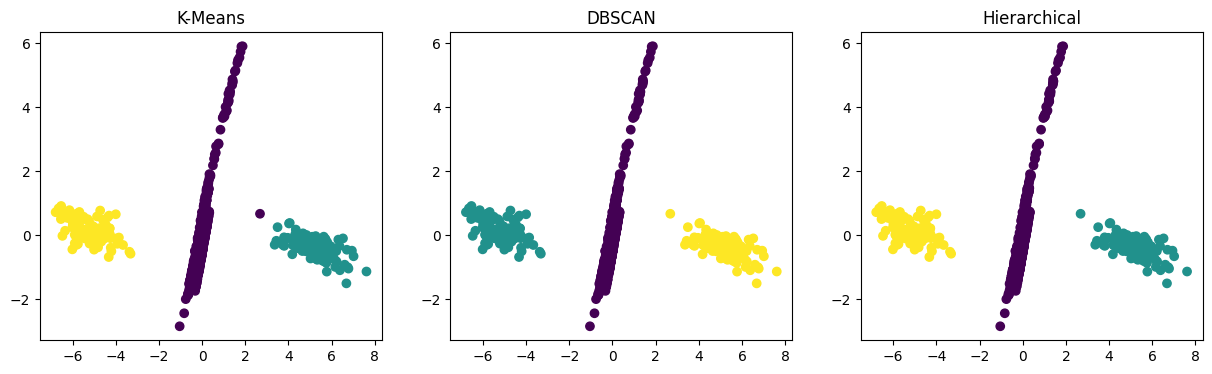

In [40]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title("K-Means")
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_kmean)

plt.subplot(1, 3, 2)
plt.title("DBSCAN")
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_dbscan)

plt.subplot(1, 3, 3)
plt.title("Hierarchical")
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_hier)

plt.show()


In [41]:
# plt.figure(figsize=(15, 4))

# plt.subplot(1, 3, 1)
# plt.title("K-Means")
# plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_kmean)

# plt.subplot(1, 3, 2)
# plt.title("DBSCAN")
# plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_dbscan)

# plt.subplot(1, 3, 3)
# plt.title("Hierarchical")
# plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_hier)

# plt.show()

In [42]:
from sklearn.metrics import silhouette_score

#### Score clustring with silhouette-score

In [43]:
name_cluser = ["K-Means", "DBSCAN", "Hierarchical"]
list_cluster = [cluster_kmean, cluster_dbscan, cluster_hier]

for i in range(len(list_cluster)):
    sil_score = silhouette_score(data_scale, list_cluster[i])
    print(f"Silhouette Score for {name_cluser[i]}: {sil_score:.3f}")

Silhouette Score for K-Means: 0.566
Silhouette Score for DBSCAN: 0.566
Silhouette Score for Hierarchical: 0.566


<div dir="rtl">
 با نمایش و بررسی نمره خوشه بندی سعی شده بهترین حالت هر الگوریتم را نمایش داده بشه.
</div>

Score clustring with Davies-Bouldin

In [44]:
from sklearn.metrics import davies_bouldin_score

In [45]:
name_cluser = ["K-Means", "DBSCAN", "Hierarchical"]
list_cluster = [cluster_kmean, cluster_dbscan, cluster_hier]

for i in range(len(list_cluster)):
    dbi = davies_bouldin_score(data_scale, list_cluster[i])
    print(f"Davies-Bouldin Index for {name_cluser[i]}: {dbi:.3f}")

Davies-Bouldin Index for K-Means: 0.707
Davies-Bouldin Index for DBSCAN: 0.708
Davies-Bouldin Index for Hierarchical: 0.708


<div dir="rtl">
نمیشه بهترین الگوریتم را مشخص کرد همان طور که میبنید نتایج نزدیک به هم هستن و با تغییر پارامترها میشه نتیجه را تغییر داد.
</div>

#### Comparison of different parameters(K-Means)

Silhouette Score for 2 numbers cluster: 0.523
Silhouette Score for 3 numbers cluster: 0.566
Silhouette Score for 4 numbers cluster: 0.553
Silhouette Score for 5 numbers cluster: 0.312
Silhouette Score for 6 numbers cluster: 0.290
Silhouette Score for 7 numbers cluster: 0.270
Silhouette Score for 8 numbers cluster: 0.237
Silhouette Score for 9 numbers cluster: 0.231


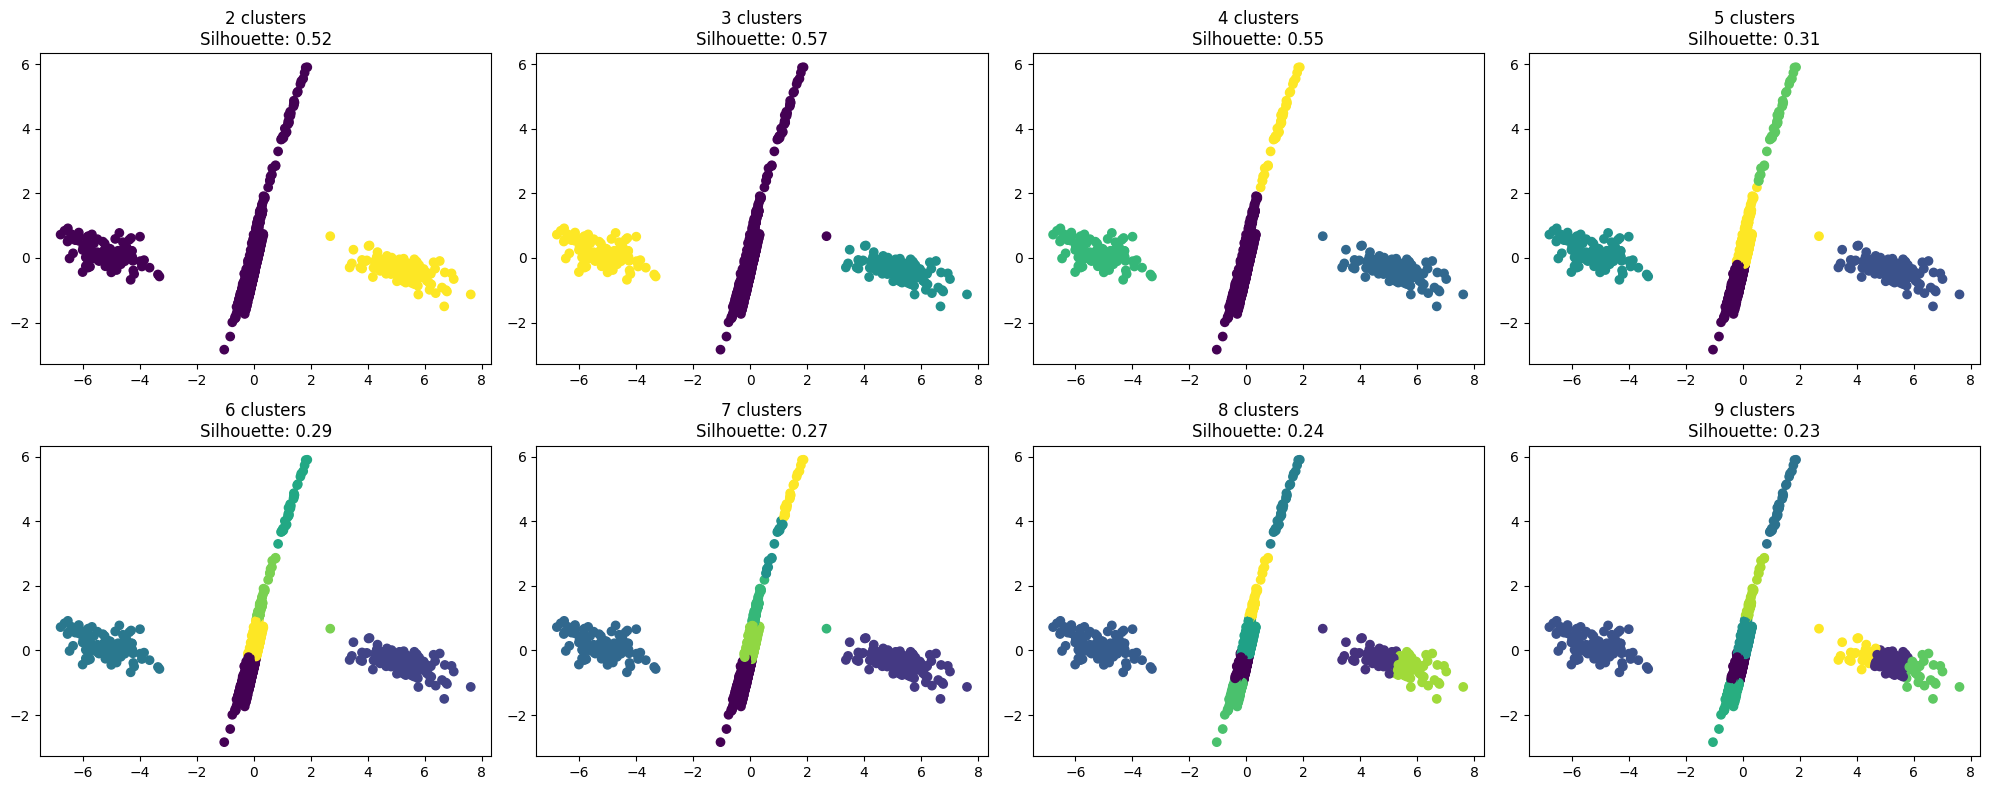

In [46]:
number_clusers = [2,3,4,5,6,7,8,9]
plt.figure(figsize=(20, 8))

for i, n in enumerate(number_clusers):
    kmeans = KMeans(n_clusters=n, random_state=0)
    cluster_kmean_test = kmeans.fit_predict(data_pca)

    dbi_test = silhouette_score(data_scale, cluster_kmean_test)
    print(f"Silhouette Score for {n} numbers cluster: {dbi_test:.3f}")

    plt.subplot(2, 4, i+1)
    plt.title(f"{n} clusters\nSilhouette: {dbi_test:.2f}")
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_kmean_test)
plt.tight_layout()
plt.show()

<div dir="rtl">
طبق شکل و نمره آن مشخص است که عدد 3 بهترین تعداد برای دسته بندی برای این دیتا است.
</div>

#### UMAP

In [47]:
# !pip install umap-learn

In [64]:
import umap

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=79)
data_umap = reducer.fit_transform(data_pca)

In [69]:
data_umap

array([[19.999176 , -2.6989412],
       [19.86352  , -2.8539295],
       [15.879498 , -5.3186293],
       ...,
       [-1.7633327,  6.0799956],
       [-1.6857895,  6.0214233],
       [-0.5754546,  5.2442656]], shape=(1000, 2), dtype=float32)

Text(0.5, 1.0, 'UMAP')

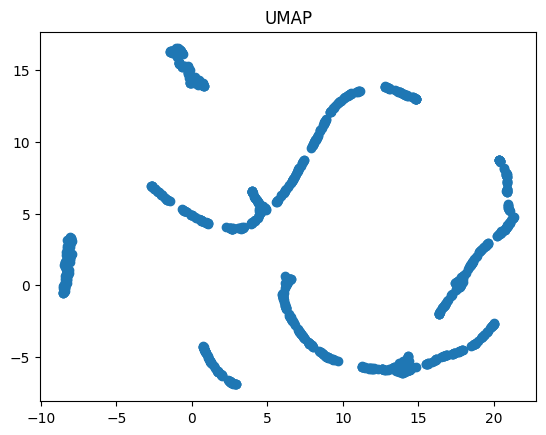

In [70]:
plt.scatter(data_umap[:, 0], data_umap[:, 1])
plt.title('UMAP')

### Compare Result(PCA , T-SNE , UMAP) 

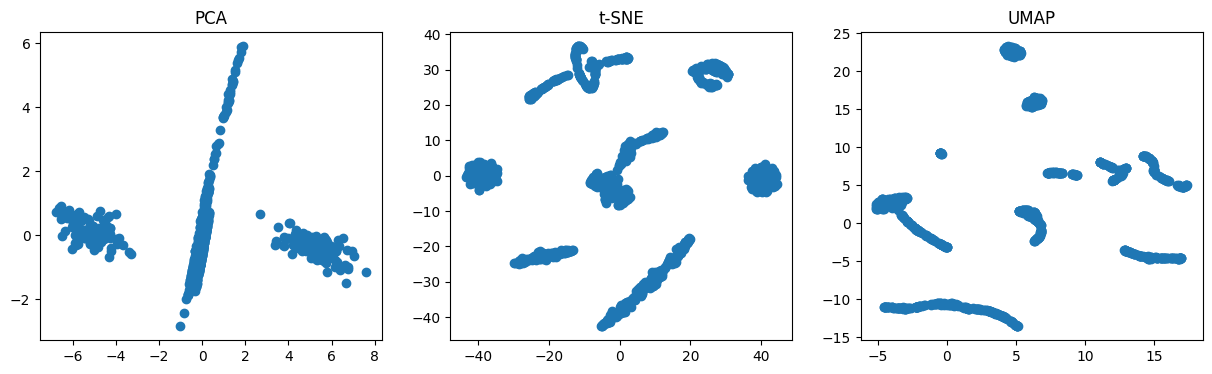

In [72]:
# 1. PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scale)

# 2. t-SNE
tsne = TSNE(n_components=2, random_state=79)
data_tsne = tsne.fit_transform(data_scale)

# 3. UMAP
reducer = umap.UMAP(n_components=2, random_state=79)
data_umap = reducer.fit_transform(data_scale)

# Show
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.title('t-SNE')

plt.subplot(1, 3, 3)
plt.scatter(data_umap[:, 0], data_umap[:, 1])
plt.title('UMAP')

plt.show()

#### Anomaly Detection

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

In [88]:
model = IsolationForest(contamination=0.01, random_state=79)
labels = model.fit_predict(data_pca)

In [89]:
colors = np.where(labels == -1, 'red', 'blue')

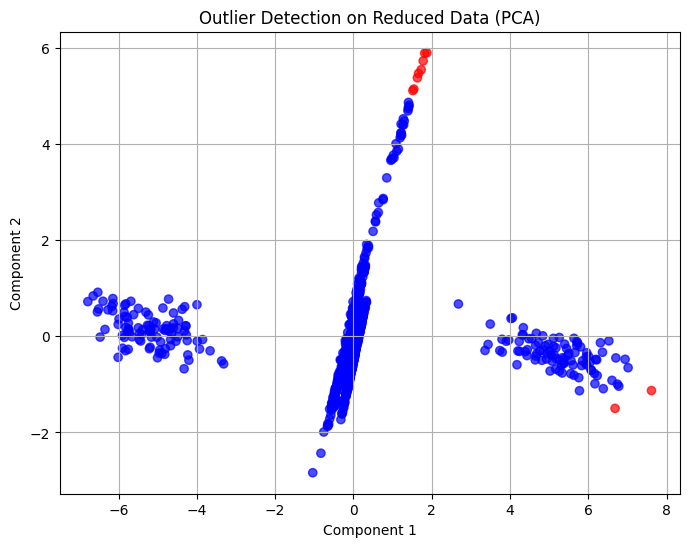

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=colors, alpha=0.7)
plt.title("Outlier Detection on Reduced Data (PCA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

#### Distinctive features of clusters

In [57]:
data['cluster'] = cluster_kmean

In [58]:
cluster_means = data.groupby('cluster').mean().round(2)

In [59]:
print("Features in each cluster:")
cluster_means

Features in each cluster:


,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,7.02,15.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,20.94,20.94,0.93,0.93,0.92,0.94,0.93,0.93,0.93,0.93
2,19.07,19.07,-0.93,-0.94,-0.92,-0.94,-0.92,-0.93,-0.93,-0.93


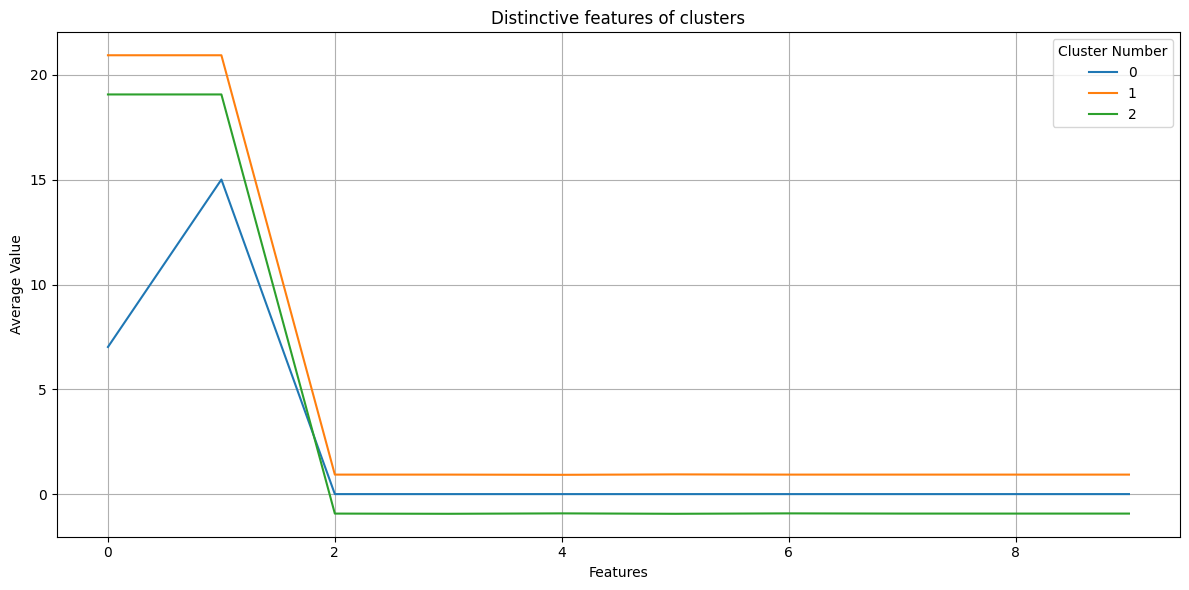

In [60]:
cluster_means.T.plot(kind='line', figsize=(12, 6))
plt.title("Distinctive features of clusters")
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.grid(True)
plt.legend(title="Cluster Number")
plt.tight_layout()
plt.show()

#### Cluster Stability

In [61]:
from sklearn.metrics import adjusted_rand_score

n_bootstrap = 100
ari_scores = []

for _ in range(n_bootstrap):

    sample_indices = np.random.choice(len(data_scale), size=len(data_scale), replace=True)
    X_sample = data_scale[sample_indices]

    sample_kmeans = KMeans(n_clusters=3, random_state=0)
    sample_labels = sample_kmeans.fit_predict(X_sample)

    ari = adjusted_rand_score(cluster_kmean[sample_indices], sample_labels)
    ari_scores.append(ari)

print("Stability of clustering with bootstrap:")
print(f"ARI Avg: {np.mean(ari_scores):.3f}")
print(f"ARI std: {np.std(ari_scores):.3f}")

Stability of clustering with bootstrap:
ARI Avg: 0.849
ARI std: 0.257


<div dir="rtl">
اگه میانگین ARI نزدیک به 1 باشه، خوشه‌بندی پایداره،
بنابراین این خوشه بندی پایدار است.
</div>